This is the main research notebook of the current project.
See full description in [README.md](https://github.com/mvulf/acm-project/blob/main/README.md)

# Import libraries and setup callbacks

In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.append('../')

from regelum.simulator import CasADi

from regelum.objective import RunningObjective
from regelum.scenario import Scenario, RLScenario

# For MPC only
from regelum.utils import rg
from regelum.predictor import EulerPredictor
from regelum.model import ModelWeightContainer
# Max Iteration count may be added in opt_options={"print_level": 0, "max_iter": MAX_ITER},
from regelum.optimizable.core.configs import CasadiOptimizerConfig
from regelum.critic import CriticTrivial
from regelum.event import Event

from src.system import HydraulicSystem, StationaryHydraulicSystem
from src.observer import StationaryHydraulicObserver
from src.policy import PDController, MPC
from src.objective import HydraulicObjectiveModel


# Callbacks
from regelum.callback import ScenarioStepLogger
from src.callback import HistoricalDataCallback, SimulatorStepLogger
from regelum import set_ipython_env
%matplotlib inline

callbacks = [SimulatorStepLogger, ScenarioStepLogger, HistoricalDataCallback]
ScenarioStepLogger.cooldown = 0.01
callbacks = set_ipython_env(callbacks=callbacks, interactive=True)

# Setup common parameters and objects

In [2]:
MAX_STEP = 1e-7
FINAL_TIME = 10e-3
SAMPLING_TIME = 1e-3

# Define the initial state
p_atm = 1e5
initial_state = rg.array([1e3, 0, 0, p_atm, p_atm])

# SYSTEM and SIMULATOR
system = HydraulicSystem(
    init_state=initial_state
)
simulator = CasADi(
    system=system,
    state_init=initial_state,
    action_init=rg.array([0]),
    time_final=FINAL_TIME,
    max_step=MAX_STEP,
)

# RUNNING OBJECTIVE
running_objective_model = HydraulicObjectiveModel(
    system=system,
    quad_matrix_type="diagonal", weights=[1, 0, 0]
)  # A quadratic model for running (a.k.a. instant) objective
running_objective = RunningObjective(
    model=running_objective_model
)  # Wrap `running_objective_model` into `RunningObjective` class

# Experiments

Below you can find experiments of both PD and MPC controller

## PD-controller

In [3]:
pd_policy = PDController(
    system=system,
    sampling_time=SAMPLING_TIME,
    P_coef=20, # Let us set it exactly as maximum action
)

scenario = Scenario(
    policy=pd_policy,
    simulator=simulator,
    sampling_time=SAMPLING_TIME,
    N_episodes=1,
    N_iterations=1,
    running_objective=running_objective,
)

scenario.run()

[23:07:59] INFO     runn. objective: 3.71, state est.: [0. 0.], observation: [0. 0.], action:      ]8;id=701393;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=317540;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [20.], value: 0.0037, time: 0.0000 (0.0%), episode: 1/1, iteration: 1/1                        

[23:08:09] INFO     runn. objective: 2.92, state est.: [  0.22 432.48], observation: [  0.22       ]8;id=806506;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=779603;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    432.48], action: [17.73], value: 0.0066, time: 0.0010 (10.0%), episode: 1/1,                   
                    iteration: 1/1                                                                                 

[23:08:22] INFO     runn. objective: 1.35, state est.: [  0.77 645.5 ], observation: [  0.77 645.5 ]8;id=538962;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=80613;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    ], action: [12.01], value: 0.0080, time: 0.0020 (20.0%), episode: 1/1,                         
                    iteration: 1/1                                                                                 

[23:08:36] INFO     runn. objective: 0.26, state est.: [  1.41 651.69], observation: [  1.41       ]8;id=230833;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=280306;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    651.69], action: [5.24], value: 0.0082, time: 0.0030 (30.0%), episode: 1/1,                    
                    iteration: 1/1                                                                                 

[23:08:57] INFO     runn. objective: 0.00, state est.: [  1.99 509.32], observation: [  1.99       ]8;id=469944;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=750796;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    509.32], action: [-0.76], value: 0.0082, time: 0.0040 (40.0%), episode: 1/1,                   
                    iteration: 1/1                                                                                 

[23:09:24] INFO     runn. objective: 0.21, state est.: [  2.38 292.82], observation: [  2.38       ]8;id=860924;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=665706;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    292.82], action: [-4.85], value: 0.0085, time: 0.0050 (50.0%), episode: 1/1,                   
                    iteration: 1/1                                                                                 

[23:10:00] INFO     runn. objective: 0.40, state est.: [ 2.56 72.43], observation: [ 2.56 72.43],  ]8;id=987868;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=43529;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.66], value: 0.0088, time: 0.0060 (60.0%), episode: 1/1, iteration:                 
                    1/1                                                                                            

[23:10:39] INFO     runn. objective: 0.41, state est.: [2.57 2.19], observation: [2.57 2.19],      ]8;id=487010;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=377219;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.8], value: 0.0093, time: 0.0070 (70.0%), episode: 1/1, iteration:                  
                    1/1                                                                                            

[23:11:08] INFO     runn. objective: 0.41, state est.: [2.57 1.79], observation: [2.57 1.79],      ]8;id=953430;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=839628;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.81], value: 0.0097, time: 0.0080 (80.0%), episode: 1/1, iteration:                 
                    1/1                                                                                            

[23:11:42] INFO     runn. objective: 0.42, state est.: [2.57 0.94], observation: [2.57 0.94],      ]8;id=511643;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=833228;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.82], value: 0.0101, time: 0.0090 (90.0%), episode: 1/1, iteration:                 
                    1/1                                                                                            

[23:12:15] INFO     runn. objective: 0.42, state est.: [2.57 2.42], observation: [2.57 2.42],      ]8;id=603594;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=412897;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.83], value: 0.0105, time: 0.0100 (100.0%), episode: 1/1,                           
                    iteration: 1/1                                                                                 

Save and display results

,time,running_objective,current_value,episode_id,iteration_id,throttle action [µm],jet length [mm],jet velocity [mm/s]
0,0.000000,3.710643,0.003711,1,1,20.000000,0.000000,0.000000
1,0.001000,2.919688,0.006630,1,1,17.729522,0.217593,432.482033
2,0.002000,1.347538,0.007978,1,1,12.012728,0.765468,645.497731
3,0.003000,0.261897,0.008240,1,1,5.239942,1.414544,651.686718
4,0.004000,0.003986,0.008244,1,1,-0.758744,1.989434,509.320458
5,0.005000,0.207389,0.008451,1,1,-4.851873,2.381703,292.824179
6,0.006000,0.395568,0.008847,1,1,-6.662694,2.555245,72.425823
7,0.007000,0.412569,0.009259,1,1,-6.802238,2.568618,2.192204
8,0.008000,0.413955,0.009673,1,1,-6.813489,2.569697,1.793389
9,0.009000,0.415268,0.010089,1,1,-6.824124,2.570716,0.942401


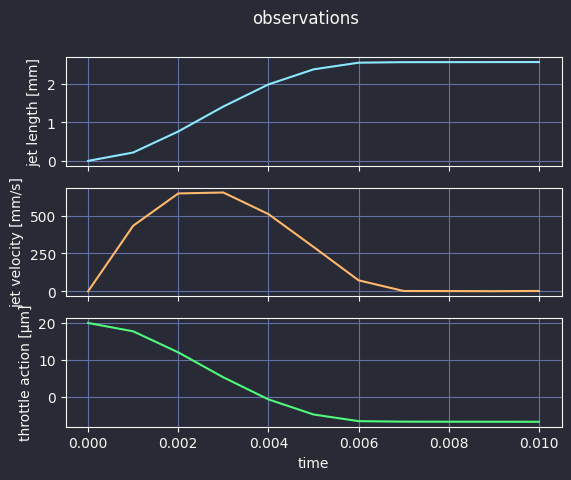

In [4]:
state_trajectory_pd = callbacks[0].data
observations_pd = callbacks[-1].data.iloc[:,:-2]
display(observations_pd)
callbacks[-1].plot(name="observations"); # Replace plot to own plot function!

# Clean callback
callbacks[0].reset()
callbacks[-1].clear_recent_data()

## Model Predictive Control (MPC)

In [5]:
PREDICTION_HORIZON = 5
ACTION_SIZE = 1
PREDICTION_STEP_SIZE = 1 * SAMPLING_TIME

model = ModelWeightContainer(
    dim_output=ACTION_SIZE, 
    weights_init=rg.zeros(
        (PREDICTION_HORIZON + 1, ACTION_SIZE), 
        rc_type=rg.CASADI
    )
)  # A trivial model contains our predicted actions
# System for the predictor
system_model = StationaryHydraulicSystem(
    init_state=initial_state
)
observer = StationaryHydraulicObserver(
    system=system_model
)
predictor = EulerPredictor(
    system=system_model, 
    pred_step_size=PREDICTION_STEP_SIZE
)  # Predictor is used for MPC-prediction

policy_mpc = MPC(
    model=model,
    system=system_model,
    action_bounds=system_model.action_bounds,
    optimizer_config=CasadiOptimizerConfig(),
    prediction_horizon=PREDICTION_HORIZON,
    running_objective=running_objective,
    predictor=predictor
)

scenario = RLScenario(
    policy=policy_mpc,
    observer = observer,
    critic=CriticTrivial(),  # mocked critic
    running_objective=running_objective,
    policy_optimization_event=Event.compute_action,  # run policy optimization on each step
    discount_factor=1.0,
    sampling_time=SAMPLING_TIME,
    simulator=simulator,
    N_episodes=1,
    N_iterations=1,
)

scenario.run()


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



[23:12:29] INFO     runn. objective: 3.71, state est.: [1000.    0.    0.], observation: [0. 0.],  ]8;id=118929;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=772862;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [20.], value: 0.0037, time: 0.0000 (0.0%), episode: 1/1, iteration:                    
                    1/1                                                                                            

[23:12:42] INFO     runn. objective: 2.92, state est.: [1000.06  117.74    7.86], observation: [   ]8;id=866334;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=936599;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.22 432.48], action: [20.], value: 0.0066, time: 0.0010 (10.0%), episode:                     
                    1/1, iteration: 1/1                                                                            

[23:12:56] INFO     runn. objective: 1.29, state est.: [1000.22  189.     12.63], observation: [   ]8;id=940205;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=1864;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.79 694.23], action: [3.37], value: 0.0079, time: 0.0020 (20.0%), episode:                    
                    1/1, iteration: 1/1                                                                            

[23:13:13] INFO     runn. objective: 0.30, state est.: [1000.38  134.83    9.  ], observation: [   ]8;id=198537;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=465424;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.38 495.24], action: [-7.11], value: 0.0082, time: 0.0030 (30.0%), episode:                   
                    1/1, iteration: 1/1                                                                            

[23:13:31] INFO     runn. objective: 0.06, state est.: [1000.46   39.89    2.66], observation: [   ]8;id=12591;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=474854;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.69 146.52], action: [0.75], value: 0.0083, time: 0.0040 (40.0%), episode:                    
                    1/1, iteration: 1/1                                                                            

[23:13:53] INFO     runn. objective: 0.01, state est.: [1000.49   28.6     1.91], observation: [   ]8;id=551894;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=325600;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.81 105.06], action: [-1.49], value: 0.0083, time: 0.0050 (50.0%), episode:                   
                    1/1, iteration: 1/1                                                                            

[23:14:23] INFO     runn. objective: 0.00, state est.: [1000.51    8.55    0.57], observation: [   ]8;id=502229;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=871398;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.87 31.39], action: [0.15], value: 0.0083, time: 0.0060 (60.0%), episode:                     
                    1/1, iteration: 1/1                                                                            

[23:14:49] INFO     runn. objective: 0.00, state est.: [1000.52    6.09    0.41], observation: [   ]8;id=233179;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=634385;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.9  22.37], action: [-0.32], value: 0.0083, time: 0.0070 (70.0%), episode:                    
                    1/1, iteration: 1/1                                                                            

[23:15:21] INFO     runn. objective: 0.00, state est.: [1000.52    1.83    0.12], observation:     ]8;id=434866;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=420157;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [1.92 6.7 ], action: [0.03], value: 0.0083, time: 0.0080 (80.0%), episode:                     
                    1/1, iteration: 1/1                                                                            

[23:15:54] INFO     runn. objective: 0.00, state est.: [1000.52    1.29    0.09], observation:     ]8;id=50253;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=912270;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [1.92 4.75], action: [-0.07], value: 0.0083, time: 0.0090 (90.0%), episode:                    
                    1/1, iteration: 1/1                                                                            

[23:16:29] INFO     runn. objective: 0.00, state est.: [1000.52    0.39    0.03], observation:     ]8;id=836223;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=393951;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [1.92 1.45], action: [0.01], value: 0.0083, time: 0.0100 (100.0%), episode:                    
                    1/1, iteration: 1/1                                                                            

Save and display results

,time,running_objective,current_value,episode_id,iteration_id,throttle action [µm],jet length [mm],jet velocity [mm/s],piston position [µm],piston velocity [µm/s],throttle position [µm]
0,0.000000,3.710643,0.003711,1,1,20.000000,0.000000,0.000000,1000.000000,0.000000,0.000000
1,0.001000,2.919688,0.006630,1,1,20.000000,0.217593,432.482032,1000.059240,117.743233,7.856631
2,0.002000,1.287058,0.007917,1,1,3.366563,0.791817,694.231119,1000.215572,189.004422,12.629617
3,0.003000,0.299487,0.008217,1,1,-7.111151,1.379049,495.240647,1000.375446,134.829266,8.999252
4,0.004000,0.057826,0.008275,1,1,0.750924,1.685832,146.520690,1000.458968,39.890258,2.659630
5,0.005000,0.013571,0.008288,1,1,-1.491658,1.809810,105.055304,1000.492721,28.601306,1.906858
6,0.006000,0.002634,0.008291,1,1,0.153753,1.874984,31.389021,1000.510464,8.545661,0.569714
7,0.007000,0.000616,0.008292,1,1,-0.316778,1.901481,22.365722,1000.517678,6.089068,0.405940
8,0.008000,0.000120,0.008292,1,1,0.031959,1.915365,6.704835,1000.521458,1.825391,0.121693
9,0.009000,0.000028,0.008292,1,1,-0.066606,1.921013,4.750175,1000.522996,1.293235,0.086216


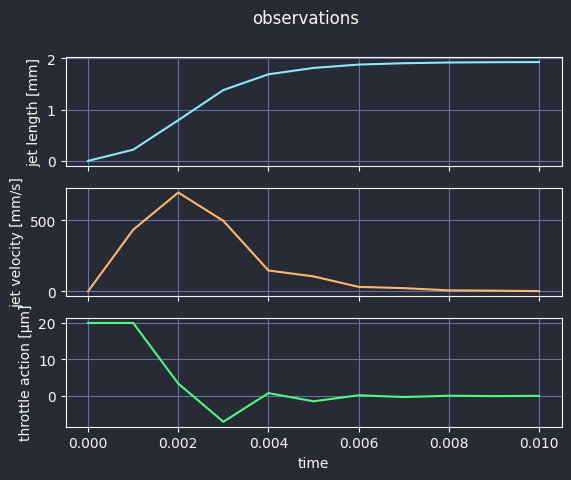

In [6]:
state_trajectory_mpc = callbacks[0].data
observations_mpc = callbacks[-1].data
display(observations_mpc)
callbacks[-1].plot(name="observations"); # Replace plot to own plot function!

# Clean callback
callbacks[0].reset()
callbacks[-1].clear_recent_data()

# Results

Let us get relative objectives and compare them

In [7]:
observations_list = [
    ('pd', observations_pd),
    ('mpc', observations_mpc)
]

results = []

l_crit = system._parameters["l_crit"]

for name, observations in observations_list:
    last_running_objective = observations['running_objective'].iloc[-1]
    last_running_objective /= l_crit**2 # Get value relative to critical jet length
    
    last_value = observations['current_value'].iloc[-1]
    last_value *= 1e3/l_crit**2 # Get value for ms relative to critical jet length
    
    results.append(
        {
            'control': name,
            'last_running_objective': last_running_objective,
            'value': last_value
        }
    )
    
results = pd.DataFrame(results)
print('Results')
display(results)

percentage = (
    (results['value'].iloc[0] - results['value'].iloc[1])
    /results['value'].iloc[0]
)
print(
    f'Thus, value (total cost) was reduced by {percentage*100:.1f}%'
)

Results


,control,last_running_objective,value
0,pd,0.113365,2.859422
1,mpc,0.000001,2.256967


Thus, value (total cost) was reduced by 21.1%


Below you can find experiments of both PD and MPC controller for system with noize

In [8]:
# Update observation noize std
system.update_system_parameters(
    {
        "jet_length_std": 10e-2, # Was 10e-2
        "jet_velocity_std": 2e-2, # Was 2e-2
    }
)

{
    'p_l_gauge': 150000.0,
    'x_th_limits': (0.0, 20.0),
    'freq_th': 500.0,
    'm_p': 0.02,
    'D_th': 0.0002,
    'D_hydr': 0.02,
    'D_work': 0.02,
    'h_work_init': 1000.0,
    'D_exit': 0.00033,
    'l_exit': 0.0085,
    'p_coulomb': 10000.0,
    'eta': 0.7,
    'zeta_th': 5.0,
    'rho_hydr': 1000.0,
    'rho_work': 1000.0,
    'beta_v_hydr': 4.9e-10,
    'beta_v_work': 4.9e-10,
    'sigma_work': 0.073,
    'mu_work': 0.001,
    'v_j': 200.0,
    'jet_length_std': 0.1,
    'jet_velocity_std': 0.02,
    'pressure_std': 0.0,
    'p_atm': 100000.0,
    'g': 9.81,
    'p_l': 250000.0,
    'F_g': 0.1962,
    'A_hydr': 0.0003141592653589793,
    'A_work': 0.0003141592653589793,
    'D_work_exit_2_ratio': 3673.0945821854916,
    'F_coulomb': 3.141592653589793,
    'B_th': 0.04,
    'B_exit': 7.403375106024279,
    'K_hydr': 2040816326.5306125,
    'K_work': 2040816326.5306125,
    'l_crit': 1.9167193623596763,
    'D_drop': 0.6220073077450254
}

## PD-controller for system with noize

In [9]:
pd_policy = PDController(
    system=system,
    sampling_time=SAMPLING_TIME,
    P_coef=20, # Let us set it exactly as maximum action
)

scenario = Scenario(
    policy=pd_policy,
    simulator=simulator,
    sampling_time=SAMPLING_TIME,
    N_episodes=7,
    N_iterations=1,
    running_objective=running_objective,
)

scenario.run()

[23:26:21] INFO     runn. objective: 3.71, state est.: [0. 0.], observation: [0. 0.], action:      ]8;id=170880;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=427033;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [20.], value: 0.0037, time: 0.0000 (0.0%), episode: 1/7, iteration: 1/1                        

[23:26:31] INFO     runn. objective: 2.86, state est.: [  0.24 432.5 ], observation: [  0.24 432.5 ]8;id=466639;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=278448;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    ], action: [17.54], value: 0.0066, time: 0.0010 (10.0%), episode: 1/7,                         
                    iteration: 1/1                                                                                 

[23:26:43] INFO     runn. objective: 1.26, state est.: [  0.81 641.41], observation: [  0.81       ]8;id=753203;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=859753;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    641.41], action: [11.59], value: 0.0078, time: 0.0020 (20.0%), episode: 1/7,                   
                    iteration: 1/1                                                                                 

[23:26:59] INFO     runn. objective: 0.18, state est.: [  1.51 640.16], observation: [  1.51       ]8;id=794316;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=76256;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    640.16], action: [4.27], value: 0.0080, time: 0.0030 (30.0%), episode: 1/7,                    
                    iteration: 1/1                                                                                 

[23:27:15] INFO     runn. objective: 0.02, state est.: [  2.08 481.37], observation: [  2.08       ]8;id=837856;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=169711;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    481.37], action: [-1.68], value: 0.0080, time: 0.0040 (40.0%), episode: 1/7,                   
                    iteration: 1/1                                                                                 

[23:27:32] INFO     runn. objective: 0.25, state est.: [  2.43 255.9 ], observation: [  2.43 255.9 ]8;id=487810;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=849308;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    ], action: [-5.34], value: 0.0083, time: 0.0050 (50.0%), episode: 1/7,                         
                    iteration: 1/1                                                                                 

[23:27:53] INFO     runn. objective: 0.32, state est.: [ 2.49 39.31], observation: [ 2.49 39.31],  ]8;id=482441;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=390409;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-5.99], value: 0.0086, time: 0.0060 (60.0%), episode: 1/7, iteration:                 
                    1/1                                                                                            

[23:28:18] INFO     runn. objective: 0.27, state est.: [2.45 0.11], observation: [2.45 0.11],      ]8;id=196434;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=571721;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-5.56], value: 0.0089, time: 0.0070 (70.0%), episode: 1/7, iteration:                 
                    1/1                                                                                            

[23:28:40] INFO     runn. objective: 0.17, state est.: [2.33 2.74], observation: [2.33 2.74],      ]8;id=132630;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=582686;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-4.36], value: 0.0090, time: 0.0080 (80.0%), episode: 1/7, iteration:                 
                    1/1                                                                                            

[23:29:07] INFO     runn. objective: 0.16, state est.: [2.32 0.51], observation: [2.32 0.51],      ]8;id=478259;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=259752;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-4.22], value: 0.0092, time: 0.0090 (90.0%), episode: 1/7, iteration:                 
                    1/1                                                                                            

[23:29:42] INFO     runn. objective: 0.19, state est.: [2.37 2.36], observation: [2.37 2.36],      ]8;id=464335;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=608524;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-4.68], value: 0.0094, time: 0.0100 (100.0%), episode: 1/7,                           
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 3.65, state est.: [ 0.01 -0.01], observation: [ 0.01 -0.01],  ]8;id=114360;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=502877;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [19.84], value: 0.0037, time: 0.0000 (0.0%), episode: 2/7, iteration:                  
                    1/1                                                                                            

[23:30:18] INFO     runn. objective: 2.74, state est.: [  0.27 429.11], observation: [  0.27       ]8;id=79292;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=230543;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    429.11], action: [17.17], value: 0.0064, time: 0.0010 (10.0%), episode: 2/7,                   
                    iteration: 1/1                                                                                 

[23:30:57] INFO     runn. objective: 1.60, state est.: [  0.66 631.57], observation: [  0.66       ]8;id=334850;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=955140;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    631.57], action: [13.1], value: 0.0080, time: 0.0020 (20.0%), episode: 2/7,                    
                    iteration: 1/1                                                                                 

[23:31:40] INFO     runn. objective: 0.26, state est.: [  1.42 666.62], observation: [  1.42       ]8;id=429450;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=328648;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    666.62], action: [5.18], value: 0.0083, time: 0.0030 (30.0%), episode: 2/7,                    
                    iteration: 1/1                                                                                 

[23:32:25] INFO     runn. objective: 0.05, state est.: [  2.15 517.07], observation: [  2.15       ]8;id=726105;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=794643;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    517.07], action: [-2.42], value: 0.0083, time: 0.0040 (40.0%), episode: 2/7,                   
                    iteration: 1/1                                                                                 

[23:33:13] INFO     runn. objective: 0.21, state est.: [  2.39 261.66], observation: [  2.39       ]8;id=674323;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=164948;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    261.66], action: [-4.89], value: 0.0085, time: 0.0050 (50.0%), episode: 2/7,                   
                    iteration: 1/1                                                                                 

[23:34:00] INFO     runn. objective: 0.27, state est.: [ 2.44 52.7 ], observation: [ 2.44 52.7 ],  ]8;id=84473;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=153974;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-5.49], value: 0.0088, time: 0.0060 (60.0%), episode: 2/7, iteration:                 
                    1/1                                                                                            

[23:35:13] INFO     runn. objective: 0.19, state est.: [2.36 0.13], observation: [2.36 0.13],      ]8;id=10714;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=537397;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-4.68], value: 0.0090, time: 0.0070 (70.0%), episode: 2/7, iteration:                 
                    1/1                                                                                            

[23:36:28] INFO     runn. objective: 0.36, state est.: [2.52 0.79], observation: [2.52 0.79],      ]8;id=516345;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=279895;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.33], value: 0.0093, time: 0.0080 (80.0%), episode: 2/7, iteration:                 
                    1/1                                                                                            

[23:37:47] INFO     runn. objective: 0.32, state est.: [2.49 0.02], observation: [2.49 0.02],      ]8;id=926252;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=690713;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-5.98], value: 0.0096, time: 0.0090 (90.0%), episode: 2/7, iteration:                 
                    1/1                                                                                            

[23:39:19] INFO     runn. objective: 0.34, state est.: [2.51 1.28], observation: [2.51 1.28],      ]8;id=434244;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=73281;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.18], value: 0.0100, time: 0.0100 (100.0%), episode: 2/7,                           
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 3.79, state est.: [-0.02  0.02], observation: [-0.02  0.02],  ]8;id=119476;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=538116;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [20.], value: 0.0038, time: 0.0000 (0.0%), episode: 3/7, iteration:                    
                    1/1                                                                                            

[23:40:50] INFO     runn. objective: 2.67, state est.: [  0.29 432.49], observation: [  0.29       ]8;id=13186;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=607869;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    432.49], action: [16.95], value: 0.0065, time: 0.0010 (10.0%), episode: 3/7,                   
                    iteration: 1/1                                                                                 

[23:42:09] INFO     runn. objective: 1.29, state est.: [  0.79 628.72], observation: [  0.79       ]8;id=457194;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=905212;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    628.72], action: [11.75], value: 0.0077, time: 0.0020 (20.0%), episode: 3/7,                   
                    iteration: 1/1                                                                                 

[23:42:52] INFO     runn. objective: 0.28, state est.: [  1.4  635.73], observation: [  1.4        ]8;id=851041;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=528088;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    635.73], action: [5.41], value: 0.0080, time: 0.0030 (30.0%), episode: 3/7,                    
                    iteration: 1/1                                                                                 

[23:43:41] INFO     runn. objective: 0.02, state est.: [  2.08 503.34], observation: [  2.08       ]8;id=654618;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=382600;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    503.34], action: [-1.67], value: 0.0081, time: 0.0040 (40.0%), episode: 3/7,                   
                    iteration: 1/1                                                                                 

[23:44:39] INFO     runn. objective: 0.23, state est.: [  2.41 269.46], observation: [  2.41       ]8;id=726897;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=833567;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    269.46], action: [-5.1], value: 0.0083, time: 0.0050 (50.0%), episode: 3/7,                    
                    iteration: 1/1                                                                                 

[23:45:41] INFO     runn. objective: 0.23, state est.: [ 2.4  52.96], observation: [ 2.4  52.96],  ]8;id=78437;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=867795;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-5.08], value: 0.0085, time: 0.0060 (60.0%), episode: 3/7, iteration:                 
                    1/1                                                                                            

[23:46:48] INFO     runn. objective: 0.54, state est.: [2.66 0.57], observation: [2.66 0.57],      ]8;id=31911;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=900172;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-7.75], value: 0.0090, time: 0.0070 (70.0%), episode: 3/7, iteration:                 
                    1/1                                                                                            

[23:47:57] INFO     runn. objective: 0.41, state est.: [2.56 2.33], observation: [2.56 2.33],      ]8;id=765979;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=409463;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.75], value: 0.0095, time: 0.0080 (80.0%), episode: 3/7, iteration:                 
                    1/1                                                                                            

[23:49:05] INFO     runn. objective: 0.30, state est.: [2.47 0.52], observation: [2.47 0.52],      ]8;id=298516;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=478902;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-5.81], value: 0.0097, time: 0.0090 (90.0%), episode: 3/7, iteration:                 
                    1/1                                                                                            

[23:50:15] INFO     runn. objective: 0.36, state est.: [2.53 1.36], observation: [2.53 1.36],      ]8;id=80534;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=869672;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.4], value: 0.0101, time: 0.0100 (100.0%), episode: 3/7, iteration:                 
                    1/1                                                                                            

           INFO     runn. objective: 3.77, state est.: [-0.01 -0.  ], observation: [-0.01 -0.  ],  ]8;id=699020;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=223043;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [20.], value: 0.0038, time: 0.0000 (0.0%), episode: 4/7, iteration:                    
                    1/1                                                                                            

[23:51:26] INFO     runn. objective: 2.74, state est.: [  0.27 432.47], observation: [  0.27       ]8;id=740910;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=618565;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    432.47], action: [17.17], value: 0.0065, time: 0.0010 (10.0%), episode: 4/7,                   
                    iteration: 1/1                                                                                 

[23:52:41] INFO     runn. objective: 1.36, state est.: [  0.76 633.52], observation: [  0.76       ]8;id=841031;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=445034;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    633.52], action: [12.06], value: 0.0079, time: 0.0020 (20.0%), episode: 4/7,                   
                    iteration: 1/1                                                                                 

[23:54:00] INFO     runn. objective: 0.23, state est.: [  1.45 645.29], observation: [  1.45       ]8;id=198423;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=938548;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    645.29], action: [4.91], value: 0.0081, time: 0.0030 (30.0%), episode: 4/7,                    
                    iteration: 1/1                                                                                 

[23:55:22] INFO     runn. objective: 0.00, state est.: [  1.96 498.26], observation: [  1.96       ]8;id=311060;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=421992;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    498.26], action: [-0.44], value: 0.0081, time: 0.0040 (40.0%), episode: 4/7,                   
                    iteration: 1/1                                                                                 

[23:56:45] INFO     runn. objective: 0.35, state est.: [  2.51 292.89], observation: [  2.51       ]8;id=585358;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=418087;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    292.89], action: [-6.23], value: 0.0084, time: 0.0050 (50.0%), episode: 4/7,                   
                    iteration: 1/1                                                                                 

[23:58:09] INFO     runn. objective: 0.37, state est.: [ 2.53 42.51], observation: [ 2.53 42.51],  ]8;id=530974;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=542069;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.42], value: 0.0088, time: 0.0060 (60.0%), episode: 4/7, iteration:                 
                    1/1                                                                                            

[23:59:34] INFO     runn. objective: 0.45, state est.: [2.6  1.93], observation: [2.6  1.93],      ]8;id=696301;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=680337;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-7.12], value: 0.0093, time: 0.0070 (70.0%), episode: 4/7, iteration:                 
                    1/1                                                                                            

[00:00:55] INFO     runn. objective: 0.21, state est.: [2.39 0.93], observation: [2.39 0.93],      ]8;id=380175;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=518461;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-4.91], value: 0.0095, time: 0.0080 (80.0%), episode: 4/7, iteration:                 
                    1/1                                                                                            

[00:02:10] INFO     runn. objective: 0.35, state est.: [2.52 0.07], observation: [2.52 0.07],      ]8;id=432473;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=166859;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.29], value: 0.0098, time: 0.0090 (90.0%), episode: 4/7, iteration:                 
                    1/1                                                                                            

[00:03:25] INFO     runn. objective: 0.33, state est.: [2.5  1.81], observation: [2.5  1.81],      ]8;id=177211;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=767637;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.14], value: 0.0102, time: 0.0100 (100.0%), episode: 4/7,                           
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 4.01, state est.: [-0.08  0.04], observation: [-0.08  0.04],  ]8;id=716067;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=543308;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [20.], value: 0.0040, time: 0.0000 (0.0%), episode: 5/7, iteration:                    
                    1/1                                                                                            

[00:04:50] INFO     runn. objective: 2.78, state est.: [  0.26 432.5 ], observation: [  0.26 432.5 ]8;id=251662;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=776531;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    ], action: [17.31], value: 0.0068, time: 0.0010 (10.0%), episode: 5/7,                         
                    iteration: 1/1                                                                                 

[00:06:25] INFO     runn. objective: 1.24, state est.: [  0.81 636.43], observation: [  0.81       ]8;id=473066;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=238725;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    636.43], action: [11.54], value: 0.0080, time: 0.0020 (20.0%), episode: 5/7,                   
                    iteration: 1/1                                                                                 

[00:07:58] INFO     runn. objective: 0.24, state est.: [  1.44 635.92], observation: [  1.44       ]8;id=425246;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=316929;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    635.92], action: [4.96], value: 0.0083, time: 0.0030 (30.0%), episode: 5/7,                    
                    iteration: 1/1                                                                                 

[00:09:31] INFO     runn. objective: 0.01, state est.: [  1.81 493.73], observation: [  1.81       ]8;id=995706;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=500819;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    493.73], action: [1.15], value: 0.0083, time: 0.0040 (40.0%), episode: 5/7,                    
                    iteration: 1/1                                                                                 

[00:11:06] INFO     runn. objective: 0.24, state est.: [  2.41 324.58], observation: [  2.41       ]8;id=564062;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=900780;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    324.58], action: [-5.16], value: 0.0085, time: 0.0050 (50.0%), episode: 5/7,                   
                    iteration: 1/1                                                                                 

[00:12:43] INFO     runn. objective: 0.37, state est.: [ 2.53 85.06], observation: [ 2.53 85.06],  ]8;id=771952;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=53787;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.44], value: 0.0089, time: 0.0060 (60.0%), episode: 5/7, iteration:                 
                    1/1                                                                                            

[00:14:26] INFO     runn. objective: 0.52, state est.: [2.65 2.39], observation: [2.65 2.39],      ]8;id=551564;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=477673;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-7.65], value: 0.0094, time: 0.0070 (70.0%), episode: 5/7, iteration:                 
                    1/1                                                                                            

[00:16:11] INFO     runn. objective: 0.68, state est.: [2.75 0.63], observation: [2.75 0.63],      ]8;id=739418;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=440592;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-8.71], value: 0.0101, time: 0.0080 (80.0%), episode: 5/7, iteration:                 
                    1/1                                                                                            

[00:18:03] INFO     runn. objective: 0.49, state est.: [2.63 2.46], observation: [2.63 2.46],      ]8;id=644191;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=958644;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-7.42], value: 0.0106, time: 0.0090 (90.0%), episode: 5/7, iteration:                 
                    1/1                                                                                            

[00:19:56] INFO     runn. objective: 0.41, state est.: [2.56 0.31], observation: [2.56 0.31],      ]8;id=64028;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=563651;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.75], value: 0.0110, time: 0.0100 (100.0%), episode: 5/7,                           
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 3.99, state est.: [-0.07 -0.01], observation: [-0.07 -0.01],  ]8;id=509969;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=754971;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [20.], value: 0.0040, time: 0.0000 (0.0%), episode: 6/7, iteration:                    
                    1/1                                                                                            

[00:21:54] INFO     runn. objective: 2.44, state est.: [  0.36 432.46], observation: [  0.36       ]8;id=525290;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=467577;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    432.46], action: [16.2], value: 0.0064, time: 0.0010 (10.0%), episode: 6/7,                    
                    iteration: 1/1                                                                                 

[00:23:51] INFO     runn. objective: 1.43, state est.: [  0.73 612.55], observation: [  0.73       ]8;id=152855;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=929196;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    612.55], action: [12.38], value: 0.0079, time: 0.0020 (20.0%), episode: 6/7,                   
                    iteration: 1/1                                                                                 

[00:25:53] INFO     runn. objective: 0.25, state est.: [  1.43 639.59], observation: [  1.43       ]8;id=356973;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=226798;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    639.59], action: [5.07], value: 0.0081, time: 0.0030 (30.0%), episode: 6/7,                    
                    iteration: 1/1                                                                                 

[00:27:58] INFO     runn. objective: 0.03, state est.: [  2.08 498.37], observation: [  2.08       ]8;id=423454;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=867837;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    498.37], action: [-1.75], value: 0.0081, time: 0.0040 (40.0%), episode: 6/7,                   
                    iteration: 1/1                                                                                 

[00:30:01] INFO     runn. objective: 0.41, state est.: [  2.57 264.64], observation: [  2.57       ]8;id=111127;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=603536;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    264.64], action: [-6.79], value: 0.0085, time: 0.0050 (50.0%), episode: 6/7,                   
                    iteration: 1/1                                                                                 

[00:32:03] INFO     runn. objective: 0.30, state est.: [ 2.47 13.34], observation: [ 2.47 13.34],  ]8;id=795173;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=460365;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-5.77], value: 0.0088, time: 0.0060 (60.0%), episode: 6/7, iteration:                 
                    1/1                                                                                            

[00:34:06] INFO     runn. objective: 0.32, state est.: [2.5  0.46], observation: [2.5  0.46],      ]8;id=579094;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=755549;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.04], value: 0.0092, time: 0.0070 (70.0%), episode: 6/7, iteration:                 
                    1/1                                                                                            

[00:36:12] INFO     runn. objective: 0.25, state est.: [2.42 0.17], observation: [2.42 0.17],      ]8;id=339184;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=831601;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-5.29], value: 0.0094, time: 0.0080 (80.0%), episode: 6/7, iteration:                 
                    1/1                                                                                            

[00:38:20] INFO     runn. objective: 0.22, state est.: [2.4  2.11], observation: [2.4  2.11],      ]8;id=94898;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=790491;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-5.03], value: 0.0096, time: 0.0090 (90.0%), episode: 6/7, iteration:                 
                    1/1                                                                                            

[00:40:29] INFO     runn. objective: 0.12, state est.: [2.28 0.32], observation: [2.28 0.32],      ]8;id=414223;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=975001;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-3.75], value: 0.0098, time: 0.0100 (100.0%), episode: 6/7,                           
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 3.21, state est.: [ 0.13 -0.01], observation: [ 0.13 -0.01],  ]8;id=391930;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=120106;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [18.61], value: 0.0032, time: 0.0000 (0.0%), episode: 7/7, iteration:                  
                    1/1                                                                                            

[00:42:47] INFO     runn. objective: 3.09, state est.: [  0.17 402.5 ], observation: [  0.17 402.5 ]8;id=227997;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=953199;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    ], action: [18.24], value: 0.0063, time: 0.0010 (10.0%), episode: 7/7,                         
                    iteration: 1/1                                                                                 

[00:45:09] INFO     runn. objective: 1.16, state est.: [  0.85 638.28], observation: [  0.85       ]8;id=267415;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=219530;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    638.28], action: [11.13], value: 0.0075, time: 0.0020 (20.0%), episode: 7/7,                   
                    iteration: 1/1                                                                                 

[00:47:45] INFO     runn. objective: 0.33, state est.: [  1.35 628.26], observation: [  1.35       ]8;id=96829;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=883918;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    628.26], action: [5.94], value: 0.0078, time: 0.0030 (30.0%), episode: 7/7,                    
                    iteration: 1/1                                                                                 

[00:50:03] INFO     runn. objective: 0.04, state est.: [  2.13 510.04], observation: [  2.13       ]8;id=218667;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=696885;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    510.04], action: [-2.27], value: 0.0078, time: 0.0040 (40.0%), episode: 7/7,                   
                    iteration: 1/1                                                                                 

[00:52:17] INFO     runn. objective: 0.06, state est.: [  2.18 260.56], observation: [  2.18       ]8;id=593168;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=127035;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    260.56], action: [-2.73], value: 0.0079, time: 0.0050 (50.0%), episode: 7/7,                   
                    iteration: 1/1                                                                                 

[00:54:37] INFO     runn. objective: 0.54, state est.: [ 2.66 98.79], observation: [ 2.66 98.79],  ]8;id=922226;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=672843;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-7.77], value: 0.0084, time: 0.0060 (60.0%), episode: 7/7, iteration:                 
                    1/1                                                                                            

[00:56:58] INFO     runn. objective: 0.20, state est.: [2.37 0.29], observation: [2.37 0.29],      ]8;id=411863;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=646282;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-4.77], value: 0.0086, time: 0.0070 (70.0%), episode: 7/7, iteration:                 
                    1/1                                                                                            

[00:59:19] INFO     runn. objective: 0.26, state est.: [2.43 1.62], observation: [2.43 1.62],      ]8;id=155403;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=651370;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-5.38], value: 0.0089, time: 0.0080 (80.0%), episode: 7/7, iteration:                 
                    1/1                                                                                            

[01:01:43] INFO     runn. objective: 0.16, state est.: [2.33 1.96], observation: [2.33 1.96],      ]8;id=86673;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=265320;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-4.32], value: 0.0091, time: 0.0090 (90.0%), episode: 7/7, iteration:                 
                    1/1                                                                                            

[01:04:12] INFO     runn. objective: 0.16, state est.: [2.32 1.18], observation: [2.32 1.18],      ]8;id=345384;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=118966;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-4.26], value: 0.0092, time: 0.0100 (100.0%), episode: 7/7,                           
                    iteration: 1/1                                                                                 

,time,running_objective,current_value,episode_id,iteration_id,throttle action [µm],jet length [mm],jet velocity [mm/s]
0,0.000000,3.710643,0.003711,1,1,20.000000,0.000000,0.000000
1,0.001000,2.857983,0.006569,1,1,17.540110,0.235746,432.498180
2,0.002000,1.255362,0.007824,1,1,11.591114,0.805874,641.414823
3,0.003000,0.175436,0.007999,1,1,4.270497,1.507452,640.160398
4,0.004000,0.022837,0.008022,1,1,-1.676854,2.077422,481.370758
...,...,...,...,...,...,...,...,...
72,0.006000,0.540777,0.008444,7,1,-7.773271,2.661678,98.787974
73,0.007000,0.200001,0.008644,7,1,-4.766462,2.373518,0.286678
74,0.008000,0.256178,0.008900,7,1,-5.381319,2.432443,1.618667
75,0.009000,0.163439,0.009064,7,1,-4.318416,2.330579,1.962575


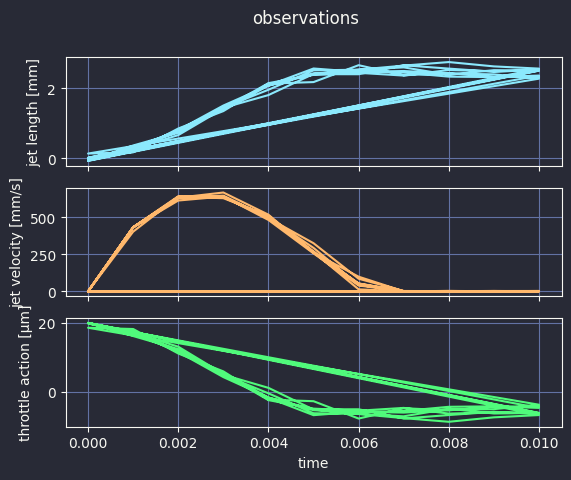

In [10]:
state_trajectory_pd_noize = callbacks[0].data
observations_pd_noize = callbacks[-1].data.iloc[:,:-2]
display(observations_pd_noize)
callbacks[-1].plot(name="observations"); # Replace plot to own plot function!

# Clean callback
callbacks[0].reset()
callbacks[-1].clear_recent_data()

## Model Predictive Control (MPC) for system with noize

In [ ]:
PREDICTION_HORIZON = 5
ACTION_SIZE = 1
PREDICTION_STEP_SIZE = 1 * SAMPLING_TIME

model = ModelWeightContainer(
    dim_output=ACTION_SIZE, 
    weights_init=rg.zeros(
        (PREDICTION_HORIZON + 1, ACTION_SIZE), 
        rc_type=rg.CASADI
    )
)  # A trivial model contains our predicted actions
# System for the predictor
system_model = StationaryHydraulicSystem(
    init_state=initial_state
)
observer = StationaryHydraulicObserver(
    system=system_model
)
predictor = EulerPredictor(
    system=system_model, 
    pred_step_size=PREDICTION_STEP_SIZE
)  # Predictor is used for MPC-prediction

policy_mpc = MPC(
    model=model,
    system=system_model,
    action_bounds=system_model.action_bounds,
    optimizer_config=CasadiOptimizerConfig(),
    prediction_horizon=PREDICTION_HORIZON,
    running_objective=running_objective,
    predictor=predictor
)

scenario = RLScenario(
    policy=policy_mpc,
    observer = observer,
    critic=CriticTrivial(),  # mocked critic
    running_objective=running_objective,
    policy_optimization_event=Event.compute_action,  # run policy optimization on each step
    discount_factor=1.0,
    sampling_time=SAMPLING_TIME,
    simulator=simulator,
    N_episodes=7,
    N_iterations=1,
)

scenario.run()

In [ ]:
state_trajectory_mpc_noize = callbacks[0].data
observations_mpc_noize = callbacks[-1].data
display(observations_mpc)
callbacks[-1].plot(name="observations"); # Replace plot to own plot function!

# Clean callback
callbacks[0].reset()
callbacks[-1].clear_recent_data()

# Results

In [20]:
import numpy as np

observations_list = [
    # ('pd', observations_pd),
    ('pd_noize', observations_pd_noize)
]

results = []

l_crit = system._parameters["l_crit"]

for name, observations in observations_list:
    
    run_obj_array = []
    max_val_array = []
    for class_index, group in observations.groupby('episode_id'):
        run_obj_array.append(group['running_objective'].iloc[-1])
        max_val_array.append(group['current_value'].iloc[-1])
        
    run_obj_array = np.array(run_obj_array)/(l_crit**2)
    max_val_array = np.array(max_val_array)*(1e3/l_crit**2)

    results.append(
        {
            'control': name,
            'last_running_objective_mean': np.mean(run_obj_array),
            'last_running_objective_std': np.std(run_obj_array),
            'value_mean': np.mean(max_val_array),
            'value_std': np.std(max_val_array),
        })

results = pd.DataFrame(results)
print('Results')
display(results)


Results


,control,last_running_objective_mean,last_running_objective_std,value_mean,value_std
0,pd_noize,0.074602,0.028458,2.706856,0.147354
